




# Ifood test  



##- The objective




## The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database.

## - The data 

##The data set contains socio-demographic and firmographic features about 2.240 customers who
##were contacted. Additionally, it contains a flag for those customers who responded the campaign,by buying the product.

## The challengue


## - 1 Explore the data . to provide the marketing team a better understanding of the characteristic features of respondents
## - 2 Create and describe a customer segmentation based on customers behaviors
## - 3 Create and describe a predictive model (classification) which allows the company to maximize the profit of the next marketing campaign.

## First we import the libraries we are going to use 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Bring the dataset

In [11]:
df = pd.read_csv("/content/drive/MyDrive/PruebaIfood/ml_project1_data.csv",index_col=0, encoding='latin-1')


In [12]:
df0= df.copy()

## Start exploring the data to see how many columns and rows we had plus the type of data that contained each column with the .info

In [13]:
df.shape

(2240, 28)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

## We add the age column to know more easily the number  

In [15]:
df['Age'] = 2022- df['Year_Birth']
df1=df.copy()

## Now, we are going to look for missing and null values in the data 

In [16]:
for col in df.columns:
  nulos= df[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/2240))

Year_Birth 0.00%
Education 0.00%
Marital_Status 0.00%
Income 1.07%
Kidhome 0.00%
Teenhome 0.00%
Dt_Customer 0.00%
Recency 0.00%
MntWines 0.00%
MntFruits 0.00%
MntMeatProducts 0.00%
MntFishProducts 0.00%
MntSweetProducts 0.00%
MntGoldProds 0.00%
NumDealsPurchases 0.00%
NumWebPurchases 0.00%
NumCatalogPurchases 0.00%
NumStorePurchases 0.00%
NumWebVisitsMonth 0.00%
AcceptedCmp3 0.00%
AcceptedCmp4 0.00%
AcceptedCmp5 0.00%
AcceptedCmp1 0.00%
AcceptedCmp2 0.00%
Complain 0.00%
Z_CostContact 0.00%
Z_Revenue 0.00%
Response 0.00%
Age 0.00%


##We drop the missing values since there is not even 5% of the information

In [17]:
df1.dropna(inplace=True)

In [18]:
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,65
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,68
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,57
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,38
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,41


## Since we find through the .info that some columns are not numerical, we are going to encode these columns to not lose relevant information for model construction

In [19]:
df1=pd.get_dummies(df1, columns=["Education", "Marital_Status"])


In [20]:
df2=df1.copy()

In [21]:
df2.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,0,1,0,0,0
2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,0,1,0,0,0
4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,1,0,0,0,1,0,0,0,0


## Now we look for some statistics measures like the mean and the quartiles of the numerical variables  

In [22]:
df2.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,0.164711,0.217058,0.000903,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,0.371003,0.412335,0.030035,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Customer segmentation

## From the .describe we find that for the numerical variables our customers had a mean annual income of 52247 with the minimum being 1730 and a max of 666666 Being the target all the poeple that had an Income between 35303 and 68522 , about the amount spent per category the information shows the mean spent for wines is of 303.93 with a spend target between 23.75 and 504.25  for fruits of 26.30 with with a spend target between 1.0 and 33.00 for meat products 166.95 with a spend target between 16.00 and 232.00 for FishProducts 37.52 with a spend target between 3.00 and 50.00 and sweet products 27.06. with a spend target between 1.00 and 33.00

##With this table we also know that the mean time of recency is of 49 days also the customers that had more than 1 son or more are  located in the 4th quartile finally the mean age of our customers is of 53.19 years having a minimum age of 11.98 and a very unusual max of 129 years however our target range oscillates between the 26 and 63 years

## Qualitative variables


## After the .describe that provide us information about the numerical variables, we will take a look at the qualitative ones for these case, the educational level the marital status, and the date the customer enrolled with the app we are going to focus more on the socio demographical that is the educational level and the marital status.

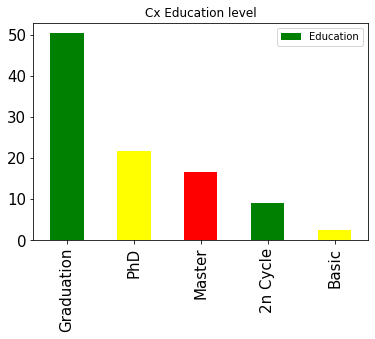

In [23]:
dfpe = df['Education'].value_counts(normalize=True) * 100 
dfpe.plot.bar(fontsize= 15, width=0.5,color=['green','yellow','red'],title='Cx Education level',legend='reverse' )

In [24]:
df['Education'].value_counts(normalize=True) * 100 

Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: Education, dtype: float64

## So as we can see the educational level of our target customers is mostly people that had already graduated from college and above having the percentage of graduates in 50.312% followed by the Ph.D.'s with 21.69% and in the third place people with a Master with 9.06% and the remaining 2 categories that are 2n Cycle and basic with a combined percentage of 11.47%

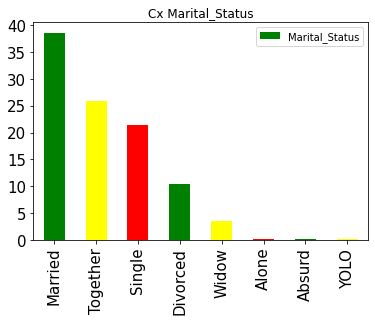

In [25]:
dfpms = df['Marital_Status'].value_counts(normalize=True) * 100 
dfpms.plot.bar(fontsize= 15, width=0.5,color=['green','yellow','red'],title='Cx Marital_Status',legend='reverse' )

In [26]:
df['Marital_Status'].value_counts(normalize=True) * 100

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64

## Regards the marital status of our customers the principal target it is mainly composed by accompanied(Married, Together) people that represent the 64.46% of the customers and second followed by our secondary target of 31.45% of the single and divorced people these groups of people sum the 95.91% of our customers leaving the remaining 5% for the other marital statutes 

## Clasification model construcction




## Now that we had our dataset for the model we assign the X and Y for the train test





In [27]:
X =df2[["Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases",
        "NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Age","Income","Kidhome","Teenhome","Education_2n Cycle","Education_Basic",
        "Education_Graduation","Education_Master","Education_PhD","Marital_Status_Absurd","Marital_Status_Alone","Marital_Status_Divorced","Marital_Status_Married","Marital_Status_Single","Marital_Status_Together",
        "Marital_Status_Widow","Marital_Status_YOLO"]]
Y = df2["Response"]


In [28]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

## We apply an standard scaler before training the model

In [29]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


##Now, we are going to train de SVC(support vector classifier) 

In [30]:

classifier = SVC(kernel='linear')
classifier.fit(X_Train, Y_Train)


SVC(kernel='linear')

## We now generate the prediction with the test data

In [31]:
Y_Pred = classifier.predict(X_Test)


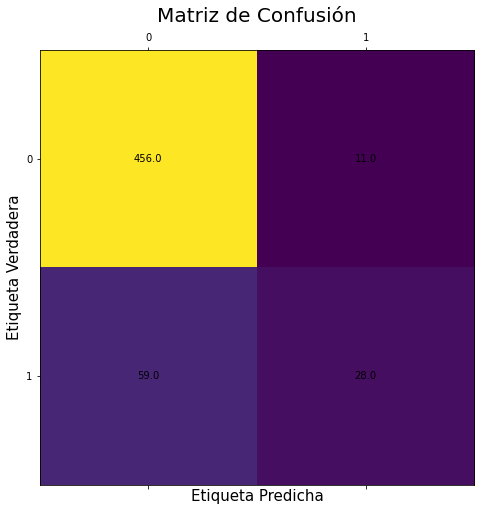

In [38]:
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


## After training and testing our classifier the performance of it, is shown on the classification report next, the formula for recall and precision are defined as 

\begin{align}
        Precision  = \frac{tp \,}{tp+fp}
    \end{align}

\begin{align}
           Recall  =  \frac{tp \,}{tp+fn}
    \end{align}

In [33]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       467
           1       0.72      0.32      0.44        87

    accuracy                           0.87       554
   macro avg       0.80      0.65      0.69       554
weighted avg       0.86      0.87      0.85       554



## This classifier will allow the company to predict the customers that aren't going to take the offer of the campaign with 89% precision and the ones that are going to with a presicion of 72%, this will help to focus the marketing budget on the customers that are likely to accept the offer instead of spraying resources and waiting for the outcome to be the expected 